In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras


In [4]:
digit_mnist=keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


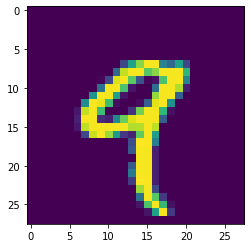

In [8]:
plt.imshow(X_train_full[4])

In [9]:
y_train_full[4]

9

In [10]:
X_train_full[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
#Data normalization
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [13]:
# spliitting data
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test=X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
#ANN USING KERAS WITH SEQUENTIAL API


In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-04-18 16:30:33.515025: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 16:30:33.517012: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights


array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [21]:
weights.shape

(784, 200)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
biases.shape

(200,)

In [24]:
#loss= y data is in labels specific thats why sparse if class
#then no sparse, if binary then binary crossentropy for loss fun*
#sgd=gradient decent telling keras back propogation method.
#classifier have accuracy and regression have mean squared error
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd", metrics=["accuracy"])

In [25]:
#few more parameter are available in fit for class weights
model_history= model.fit(X_train,y_train,epochs=60,
                        validation_data=(X_valid,y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 14s 265us/sample - loss: 0.6595 - accuracy: 0.8267 - val_loss: 0.3200 - val_accuracy: 0.9107
Epoch 2/60
54000/54000 [==============================] - 13s 235us/sample - loss: 0.3005 - accuracy: 0.9146 - val_loss: 0.2553 - val_accuracy: 0.9290
Epoch 3/60
54000/54000 [==============================] - 14s 261us/sample - loss: 0.2475 - accuracy: 0.9294 - val_loss: 0.2223 - val_accuracy: 0.9372
Epoch 4/60
54000/54000 [==============================] - 14s 257us/sample - loss: 0.2143 - accuracy: 0.9389 - val_loss: 0.1962 - val_accuracy: 0.9458
Epoch 5/60
54000/54000 [==============================] - 13s 239us/sample - loss: 0.1886 - accuracy: 0.9466 - val_loss: 0.1783 - val_accuracy: 0.9493
Epoch 6/60
54000/54000 [==============================] - 14s 264us/sample - loss: 0.1685 - accuracy: 0.9515 - val_loss: 0.1600 - val_accuracy: 0.9545
Epoch 7/60
54000/54000 [=====================

In [26]:
model_history.history

{'loss': [0.6595002249523445,
  0.3005116297955866,
  0.24751193238408478,
  0.21432226642635133,
  0.18861302600635424,
  0.1685310713008598,
  0.15128629732131957,
  0.13728822114015066,
  0.1255697628952287,
  0.11533893457441419,
  0.10611849746356408,
  0.09862037846970337,
  0.09126821204495651,
  0.08540048045306294,
  0.07990971106070059,
  0.07457187814913967,
  0.06999833195270212,
  0.06603956942536213,
  0.06227681666502246,
  0.05875189059958966,
  0.05561579063396763,
  0.052238066224726265,
  0.04936609327006671,
  0.04678694071158491,
  0.044035135345878426,
  0.04178796926209772,
  0.039588959330761876,
  0.03739997972592849,
  0.03546569365738995,
  0.03380718230690669,
  0.031894568605141504,
  0.030109091294618945,
  0.02852392272213129,
  0.027386642759769327,
  0.02586396645254421,
  0.02452023052451787,
  0.02345400317006365,
  0.022278737320047287,
  0.021104395643463014,
  0.019958520673560323,
  0.019122439785920844,
  0.018180429610734183,
  0.017281053809207

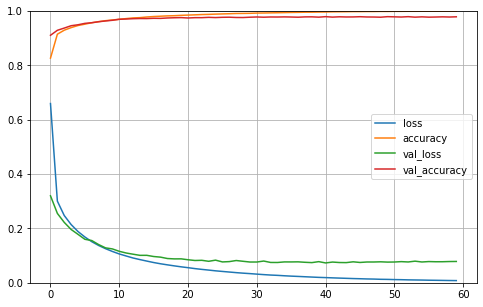

In [27]:
#Accuracy
#how our accuracy score is changing with each epoch
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
#model evaluation 97% better than decision trees or regression models
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07437467295403767, 0.9797]

In [36]:
#predict the probablities on new unseen data

In [29]:
X_new= X_test[:5]

In [30]:
#probablity of each class or class itself
#round 2 to roundoff till 2 decimal values
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
#results

In [38]:
y_pred=model.predict_classes(X_new)
y_pred

array([7, 2, 1, 0, 4])

In [ ]:
#verify results

AxesImage(54,36;334.8x217.44)


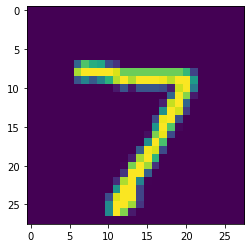

In [34]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


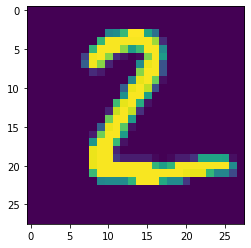

In [39]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


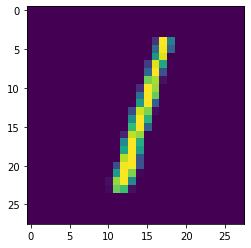

In [41]:
print(plt.imshow(X_test[2])) 

AxesImage(54,36;334.8x217.44)


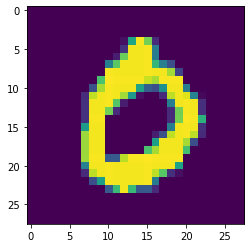

In [44]:
print(plt.imshow(X_test[3])) 

AxesImage(54,36;334.8x217.44)


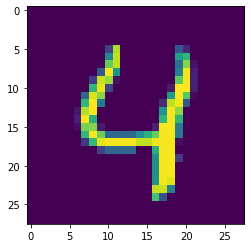

In [45]:
print(plt.imshow(X_test[4])) 